In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp
from sympy import symbols, Eq, solve
import random
sns.set()
import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'font.size': 15, 
                     'figure.figsize': (8, 8)})

sns.set_style("darkgrid")

## Pierwsza wersja logistycznej funkcji wpływu

$$f\left(x\right) = \frac{L}{1+e^{-k\left(x-x_{0}\right)}} - \frac{L}{2},$$
$x_0$ - argument środkowego punktu krzywej,

$L$ - supremum wartości funkcji,

$k$ - logistyczne tempo wzrostu, stromość krzywej.

Narazie rozważmy
$$f\left(x\right) = \frac{1}{1+e^{-kx}} - \frac{1}{2}.$$

In [15]:
def logistic(x0, L, k, x):
    y = L/(1+np.exp(-k*(x-x0))) - L/2
    return y

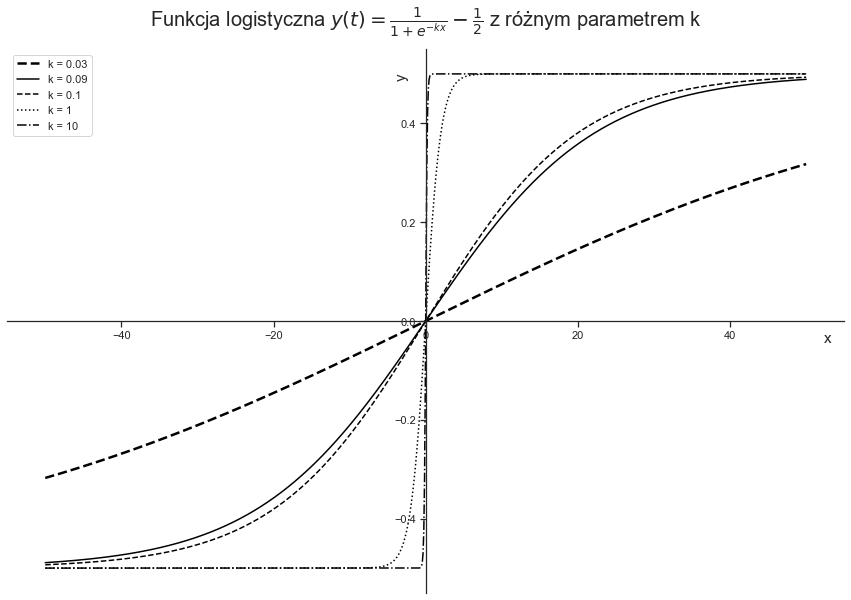

In [16]:
plt.rcParams.update({'figure.figsize': (12, 8)})
x = np.linspace(-50,50,1000)
y1 = logistic(0, 1, 0.03, x)
y2 = logistic(0, 1, 0.09, x)
y3 = logistic(0, 1, 0.1, x)
y4 = logistic(0, 1, 1, x)
y5 = logistic(0, 1, 10, x)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
sns.set_style("ticks")

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.plot(x, y1, color = "black", linestyle='dashed', linewidth=2.5, label = "k = 0.03")
plt.plot(x, y2, color = "black", linestyle="-", label = "k = 0.09")
plt.plot(x, y3, color = "black", linestyle="--", label = "k = 0.1")
plt.plot(x, y4, color = "black", linestyle=":", label = "k = 1")
plt.plot(x, y5, color = "black", linestyle="-.", label = "k = 10")
plt.title(r"Funkcja logistyczna $y\left(t\right) = \frac{1}{1+e^{-kx}}-\frac{1}{2}$ z różnym parametrem k", fontsize = 20,
         y=1.03)
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
ax.xaxis.set_label_coords(0.98, 0.48)
ax.yaxis.set_label_coords(0.48, 0.95)
plt.legend(loc='upper left')
plt.savefig("logistic_function.pdf")
plt.show()

Chcę porównać trajektorie rozwiązań związku Validating dla logistycznych funkcji wpływu z różnymi parametrami k.

In [157]:
def MC(k, r1, r2, x0, y0, epsilon, N, rhs):
    
    array_x = np.zeros(100)
    array_y = np.zeros(100)
    array_t = np.zeros(100)
    
    for i in range(N):
        x00 = random.uniform(x0-epsilon, x0+epsilon)
        y00 = random.uniform(y0-epsilon, y0+epsilon)

        array_t += rhs(k, r1, r2, x0, y0, x00, y00).t
        array_x += rhs(k, r1, r2, x0, y0, x00, y00).y.T[:, 0]
        array_y += rhs(k, r1, r2, x0, y0, x00, y00).y.T[:, 1]
        
    array_t = array_t/N
    array_x = array_x/N
    array_y = array_y/N
    
    return array_t, array_x, array_y

In [158]:
def rhs(k, r1, r2, x0, y0, x00, y00):
    
    def eq(s, v):
        return [r1*(x0-v[0])+1/(1+np.exp(-k*v[1]))-0.5, r2*(y0-v[1]) + 1/(1+np.exp(-k*v[0]))-0.5]
    
    res = solve_ivp(eq, (0, 20), [x00, y00], t_eval=np.linspace(0, 20, 100))
    return res

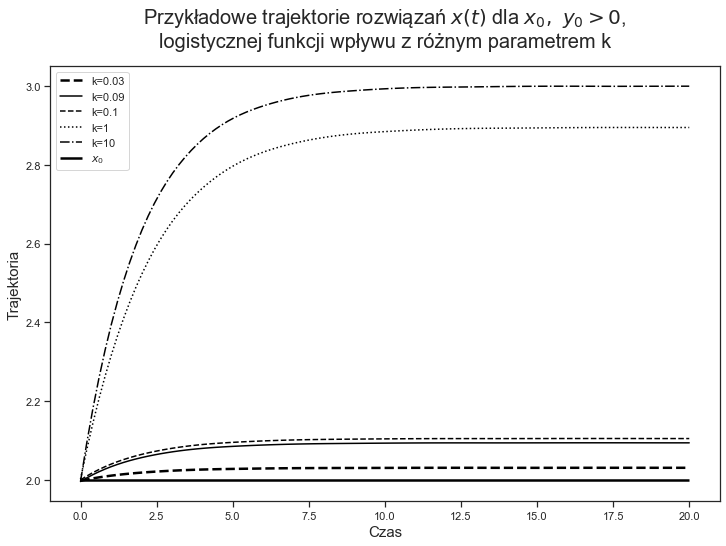

In [167]:
epsilon = 0.1

x0 = 2
y0 = 2
r1 = 0.5
r2 = 0.5
N = 100

k1 = 0.03
k2 = 0.09
k3 = 0.1
k4 = 1
k5 = 10

array_t1, array_x1, array_y1 = MC(k1, r1, r2, x0, y0, epsilon, N, rhs)
array_t2, array_x2, array_y2 = MC(k2, r1, r2, x0, y0, epsilon, N, rhs)
array_t3, array_x3, array_y3 = MC(k3, r1, r2, x0, y0, epsilon, N, rhs)
array_t4, array_x4, array_y4 = MC(k4, r1, r2, x0, y0, epsilon, N, rhs)
array_t5, array_x5, array_y5 = MC(k5, r1, r2, x0, y0, epsilon, N, rhs)


fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.set_style("ticks")
plt.plot(array_t1, array_x1, linestyle='dashed', linewidth=2.5, color="black", label="k=0.03")
plt.plot(array_t2, array_x2, linestyle="-", color="black", label="k=0.09")
plt.plot(array_t3, array_x3, linestyle="--", color="black", label="k=0.1")
plt.plot(array_t4, array_x4, linestyle=":", color="black", label="k=1")
plt.plot(array_t5, array_x5, linestyle="-.", color="black", label="k=10")

plt.hlines(y=x0, xmin=0, xmax=20, linestyles='-', linewidth = 2.5, color='black', label = "$x_{0}$")
plt.title(r"Przykładowe trajektorie rozwiązań $x\left(t\right)$ dla $x_0,~y_0>0$," + "\n" +  "logistycznej funkcji wpływu z różnym parametrem k", 
          fontsize = 20, y=1.03)
plt.xlabel("Czas", fontsize=15)
plt.ylabel("Trajektoria", fontsize=15)
plt.legend()
plt.savefig("solution1.pdf")
plt.show()


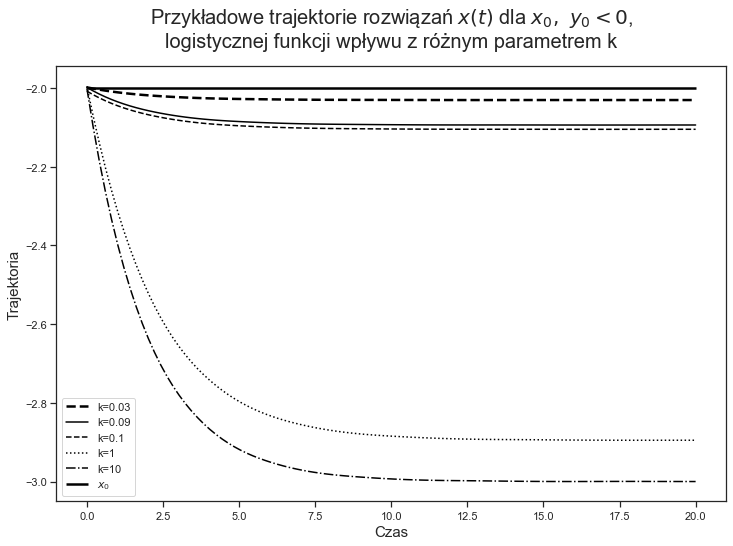

In [168]:
epsilon = 0.1

x0 = -2
y0 = -2
r1 = 0.5
r2 = 0.5
N = 100

k1 = 0.03
k2 = 0.09
k3 = 0.1
k4 = 1
k5 = 10

array_t1, array_x1, array_y1 = MC(k1, r1, r2, x0, y0, epsilon, N, rhs)
array_t2, array_x2, array_y2 = MC(k2, r1, r2, x0, y0, epsilon, N, rhs)
array_t3, array_x3, array_y3 = MC(k3, r1, r2, x0, y0, epsilon, N, rhs)
array_t4, array_x4, array_y4 = MC(k4, r1, r2, x0, y0, epsilon, N, rhs)
array_t5, array_x5, array_y5 = MC(k5, r1, r2, x0, y0, epsilon, N, rhs)


fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.set_style("ticks")
plt.plot(array_t1, array_x1, linestyle='dashed', linewidth=2.5, color="black", label="k=0.03")
plt.plot(array_t2, array_x2, linestyle="-", color="black", label="k=0.09")
plt.plot(array_t3, array_x3, linestyle="--", color="black", label="k=0.1")
plt.plot(array_t4, array_x4, linestyle=":", color="black", label="k=1")
plt.plot(array_t5, array_x5, linestyle="-.", color="black", label="k=10")

plt.hlines(y=x0, xmin=0, xmax=20, linestyles='-', linewidth = 2.5, color='black', label = "$x_{0}$")
plt.title(r"Przykładowe trajektorie rozwiązań $x\left(t\right)$ dla $x_0,~y_0<0$," + "\n" +  "logistycznej funkcji wpływu z różnym parametrem k", 
          fontsize = 20, y=1.03)
plt.xlabel("Czas", fontsize=15)
plt.ylabel("Trajektoria", fontsize=15)
plt.legend()
plt.savefig("solution1.pdf")
plt.show()


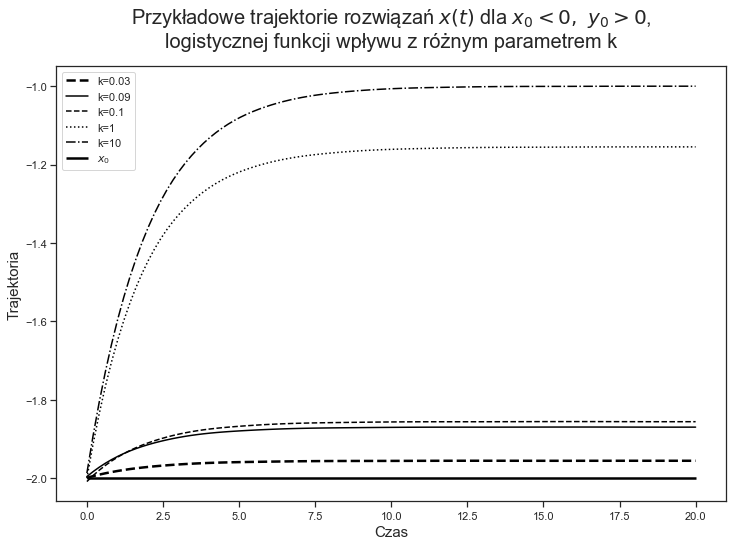

In [170]:
epsilon = 0.1

x0 = -2
y0 = 3
r1 = 0.5
r2 = 0.5
N = 100

k1 = 0.03
k2 = 0.09
k3 = 0.1
k4 = 1
k5 = 10

array_t1, array_x1, array_y1 = MC(k1, r1, r2, x0, y0, epsilon, N, rhs)
array_t2, array_x2, array_y2 = MC(k2, r1, r2, x0, y0, epsilon, N, rhs)
array_t3, array_x3, array_y3 = MC(k3, r1, r2, x0, y0, epsilon, N, rhs)
array_t4, array_x4, array_y4 = MC(k4, r1, r2, x0, y0, epsilon, N, rhs)
array_t5, array_x5, array_y5 = MC(k5, r1, r2, x0, y0, epsilon, N, rhs)


fig, ax = plt.subplots(1, 1, figsize=(12,8))
sns.set_style("ticks")
plt.plot(array_t1, array_x1, linestyle='dashed', linewidth=2.5, color="black", label="k=0.03")
plt.plot(array_t2, array_x2, linestyle="-", color="black", label="k=0.09")
plt.plot(array_t3, array_x3, linestyle="--", color="black", label="k=0.1")
plt.plot(array_t4, array_x4, linestyle=":", color="black", label="k=1")
plt.plot(array_t5, array_x5, linestyle="-.", color="black", label="k=10")

plt.hlines(y=x0, xmin=0, xmax=20, linestyles='-', linewidth = 2.5, color='black', label = "$x_{0}$")
plt.title(r"Przykładowe trajektorie rozwiązań $x\left(t\right)$ dla $x_0<0,~y_0>0$," + "\n" +  "logistycznej funkcji wpływu z różnym parametrem k", 
          fontsize = 20, y=1.03)
plt.xlabel("Czas", fontsize=15)
plt.ylabel("Trajektoria", fontsize=15)
plt.legend()
plt.savefig("solution1.pdf")
plt.show()


Chcę porównać trajektorie rozwiązań dla układu związku Validating z funkcją liniową z układem z funkcją logistyczną.

In [184]:
def MC_validating(r1, r2, x0, y0, a1, a2, epsilon, N):
    
    array_x = np.zeros(100)
    array_y = np.zeros(100)
    array_t = np.zeros(100)
    
    for i in range(N):
        x00 = random.uniform(x0-epsilon, x0+epsilon)
        y00 = random.uniform(y0-epsilon, y0+epsilon)

        array_t += rhs_validating(r1, r2, x0, y0, a1, a2, x00, y00).t
        array_x += rhs_validating(r1, r2, x0, y0, a1, a2, x00, y00).y.T[:, 0]
        array_y += rhs_validating(r1, r2, x0, y0, a1, a2, x00, y00).y.T[:, 1]
        
    array_t = array_t/N
    array_x = array_x/N
    array_y = array_y/N
    
    return array_t, array_x, array_y

In [187]:
def rhs_validating(r1, r2, x0, y0, a1, a2, x00, y00):
    
    def eq(s, v):
        return [r1*(x0-v[0])+a1*v[1], r2*(y0-v[1]) + a2*v[0]]
    
    res = solve_ivp(eq, (0, 20), [x00, y00], t_eval=np.linspace(0, 20, 100))
    return res

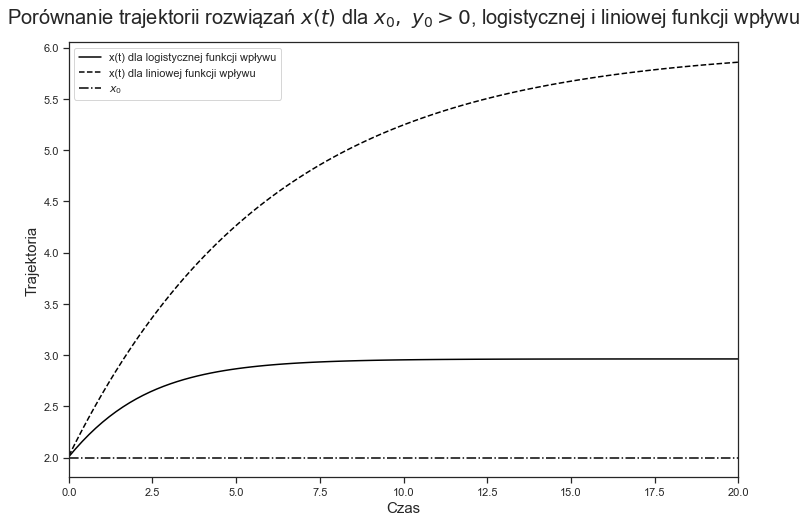

In [225]:
epsilon = 1.5

x0 = 2
y0 = 2
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
k=4/3
N = 10000

array_t1, array_x1, array_y1 = MC(k, r1, r2, x0, y0, epsilon, N, rhs)
array_t2, array_x2, array_y2 = MC_validating(r1, r2, x0, y0, a1, a2, epsilon, N)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plt.plot(array_t1, array_x1, color="black", label="x(t) dla logistycznej funkcji wpływu")
plt.plot(array_t2, array_x2, color = "black", linestyle="--", label ="x(t) dla liniowej funkcji wpływu")
plt.hlines(y=x0, xmin=0, xmax=20, linestyles='-.', color='black', label = "$x_{0}$")
plt.title(r"Porównanie trajektorii rozwiązań $x\left(t\right)$ dla $x_0,~y_0>0$, logistycznej i liniowej funkcji wpływu", fontsize = 20,
         y = 1.03)
plt.xlabel("Czas", fontsize=15)
plt.ylabel("Trajektoria", fontsize=15)
plt.xlim(0,20)
plt.legend()
plt.savefig("solution2.png")
plt.show()

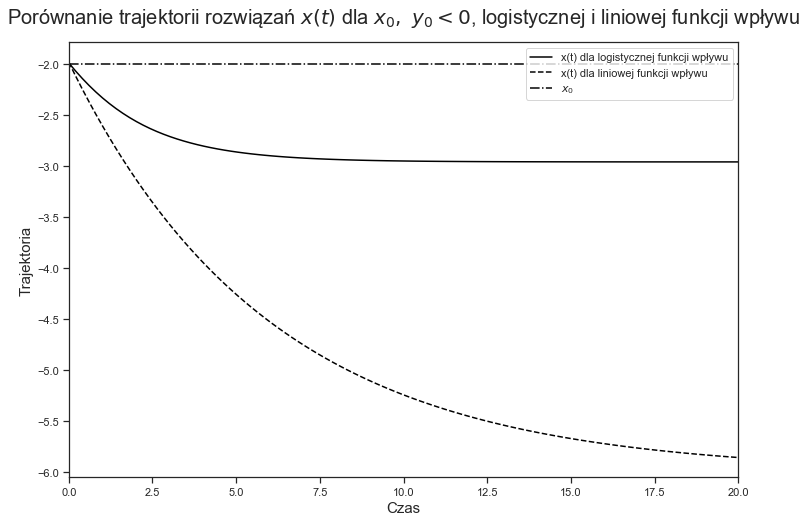

In [226]:
epsilon = 1.5

x0 = -2
y0 = -2
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
k=4/3
N = 10000

array_t1, array_x1, array_y1 = MC(k, r1, r2, x0, y0, epsilon, N, rhs)
array_t2, array_x2, array_y2 = MC_validating(r1, r2, x0, y0, a1, a2, epsilon, N)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plt.plot(array_t1, array_x1, color="black", label="x(t) dla logistycznej funkcji wpływu")
plt.plot(array_t2, array_x2, color = "black", linestyle="--", label ="x(t) dla liniowej funkcji wpływu")
plt.hlines(y=x0, xmin=0, xmax=20, linestyles='-.', color='black', label = "$x_{0}$")
plt.title(r"Porównanie trajektorii rozwiązań $x\left(t\right)$ dla $x_0,~y_0<0$, logistycznej i liniowej funkcji wpływu", fontsize = 20,
         y = 1.03)
plt.xlabel("Czas", fontsize=15)
plt.ylabel("Trajektoria", fontsize=15)
plt.xlim(0,20)
plt.legend()
plt.savefig("solution3.png")
plt.show()

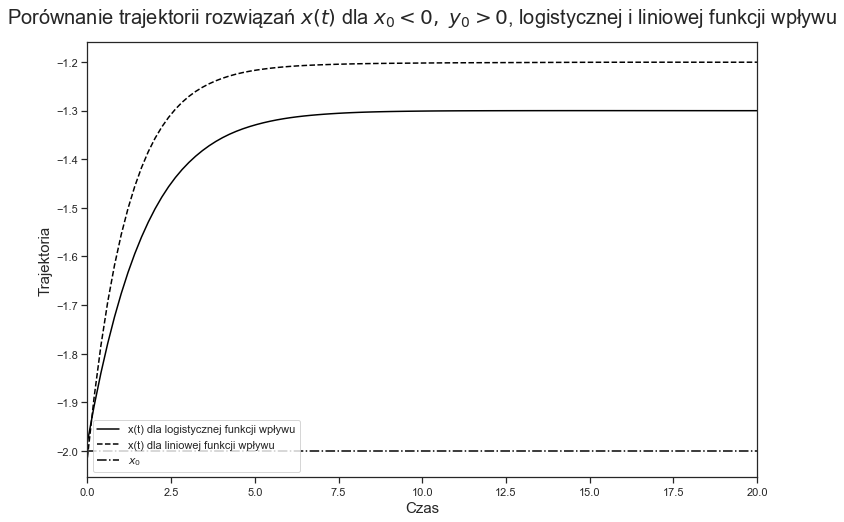

In [227]:
epsilon = 1.5

x0 = -2
y0 = 2
r1 = 0.5
r2 = 0.5
a1 = 1/3
a2 = 1/3
k=4/3
N = 10000

array_t1, array_x1, array_y1 = MC(k, r1, r2, x0, y0, epsilon, N, rhs)
array_t2, array_x2, array_y2 = MC_validating(r1, r2, x0, y0, a1, a2, epsilon, N)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plt.plot(array_t1, array_x1, color="black", label="x(t) dla logistycznej funkcji wpływu")
plt.plot(array_t2, array_x2, color = "black", linestyle="--", label ="x(t) dla liniowej funkcji wpływu")
plt.hlines(y=x0, xmin=0, xmax=20, linestyles='-.', color='black', label = "$x_{0}$")
plt.title(r"Porównanie trajektorii rozwiązań $x\left(t\right)$ dla $x_0<0,~y_0>0$, logistycznej i liniowej funkcji wpływu", fontsize = 20,
         y = 1.03)
plt.xlabel("Czas", fontsize=15)
plt.ylabel("Trajektoria", fontsize=15)
plt.xlim(0,20)
plt.legend()
plt.savefig("solution4.png")
plt.show()

## Punkty krytyczne w zależności od wartości parametru L w modelu z logistyczną funkcją wpływu - problemy

Nasz układ jest postaci
$$\frac{df}{dx} = r_1\left(x_0-x\right) + \frac{L}{1+e^{-k y}} - \frac{L}{2}$$
$$\frac{df}{dy} = r_2\left(y_0-y\right) + \frac{L}{1+e^{-k x}} - \frac{L}{2}$$

Szukamy $x^*$,$y^*$ takich, że
$$r_1\left(x_0-x^*\right) + \frac{L}{1+e^{-ky^*}} - \frac{L}{2} =0$$
$$r_2\left(y_0-y^*\right) + \frac{L}{1+e^{-kx^*}} - \frac{L}{2} =0.$$

In [7]:
def critical(L, k, x0, y0, r1, r2, x_pocz, y_pocz):
    
    def equations(p):
        x, y = p
        return (r1*(x0-x)+(L/(1+np.exp(-k*y)))-L/2, r2*(y0-y)+(L/(1+np.exp(-k*x)))-L/2)

    x, y = fsolve(equations, (x_pocz, y_pocz))
    
    return x, y

In [8]:
def stable(x, y, L, k, x0, y0, r1, r2):
    
    l1 = (-(r1+r2) + np.sqrt((r1+r2)**2 - 4*(r1*r2-L**2*k**2*np.exp(-k*(x+y))/((1+np.exp(-k*x))**2*(1+np.exp(-k*y))**2))))/2
    l2 = (-(r1+r2) - np.sqrt((r1+r2)**2 - 4*(r1*r2-L**2*k**2*np.exp(-k*(x+y))/((1+np.exp(-k*x))**2*(1+np.exp(-k*y))**2))))/2
    if l1.real <=0 and l2.real <=0:
        return True
    else:
        return False
    

In [3]:
def stable_(x, y, L, k, x0, y0, r1, r2):
    
    l1 = (-(r1+r2) + np.sqrt((r1+r2)**2 - 4*(r1*r2-L**2*k**2*np.exp(-k*(x+y))/((1+np.exp(-k*x))**2*(1+np.exp(-k*y))**2))))/2
    l2 = (-(r1+r2) - np.sqrt((r1+r2)**2 - 4*(r1*r2-L**2*k**2*np.exp(-k*(x+y))/((1+np.exp(-k*x))**2*(1+np.exp(-k*y))**2))))/2
    
    return l1, l2
    

In [9]:
x0 = 2
y0 = 3

L = np.linspace(0, 20, 100)
y = [critical(i, 1, x0, y0, 0.5, 0.5, x0, y0) for i in L]

for i,j in zip(y, L):
    if stable(i[0], i[1], j, 1, x0, y0, 0.5, 0.5) == False:
        print('Niestabilny')


Spojrzałam na wykresy w Mathematice i dobrałam starting_estimate.

In [10]:
x0 = 2
y0 = 3
L = 5
k = 1
r1 = 0.5
r2=0.5

critical(L, k, x0, y0, r1, r2, 5, 10)

(6.996615712981113, 7.990858631502806)

In [11]:
x0 = 2
y0 = 3
L = 15
k = 1
r1 = 0.5
r2=0.5

critical(L, k, x0, y0, r1, r2, 20, 20)
critical(L, k, x0, y0, r1, r2, -15, -15)

(-12.999815662261161, -11.9999321777699)

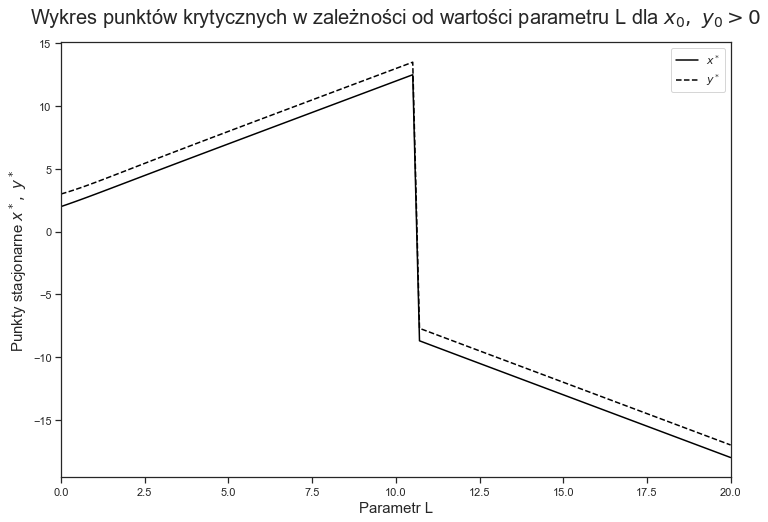

In [13]:
x0 = 2
y0 = 3
L = np.linspace(0, 20, 100)

y = [critical(i, 1, x0, y0, 0.5, 0.5, x0, y0) for i in L]
df = pd.DataFrame(y, columns = ['x', 'y'])

fig, ax1 = plt.subplots(1,1, figsize=(12,8))
sns.set_style("ticks")

# plt.hlines(y=x0, xmin=0, xmax=20, linestyle=':', label = "$x_{0}$", color='black')
# plt.hlines(y=y0, xmin=0, xmax=20, linestyle='-.', label = "$y_{0}$", color='black')
plt.plot(L, df['x'], linestyle='-', label='$x^*$', color='black')
plt.plot(L, df['y'], linestyle='--', label='$y^*$', color='black')
plt.xlabel('Parametr L', fontsize = 15)
plt.ylabel(r'Punkty stacjonarne $x^*,~y^*$', fontsize = 15)
plt.title(r'Wykres punktów krytycznych w zależności od wartości parametru L dla $x_0,~y_0>0$', fontsize = '20',
         y=1.03)
plt.xlim(0,20)
plt.legend()
plt.savefig("pkt_krytyczne1.pdf")
plt.show()

Od tej cześci już rzeczy nie poszły do pracy.

In [14]:
x0 = -2
y0 = -3
k = 1
r1 = 0.5
r2 = 0.5
L = 5
x, y = critical(5, k, x0, y0, r1, r2, 0, 0)
stable_(x, y, L, k, x0, y0, r1, r2)

(-0.0011326396619986134, -0.9988673603380014)

In [15]:
x0 = -2
y0 = -3
k = 1
r1 = 0.5
r2 = 0.5
L = 50
x, y = critical(50, k, x0, y0, r1, r2, 50, 50)
stable_(x, y, L, k, x0, y0, r1, r2)

(-0.5, -0.5)

In [16]:
critical(60, 1, -2, -3, 0.5, 0.5, 50, 50)

(58.0, 57.0)

In [18]:
x0 = -2
y0 = -3


L = np.linspace(0, 60, 100)
y = [critical(i, 1, x0, y0, 0.5, 0.5, x0, y0) for i in L]

for i,j in zip(y, L):
    if stable(i[0], i[1], j, 1, x0, y0, 0.5, 0.5) == False:
        print('Niestabilny')


Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny
Niestabilny


In [20]:
x0 = -2
y0 = -3

L = np.linspace(0, 60, 100)
y = [critical(i, 1, x0, y0, 0.5, 0.5, x0, y0) for i in L]

for i,j in zip(y, L):
    print(stable_(i[0], i[1], j, 1, x0, y0, 0.5, 0.5))


(-0.5, -0.5)
(-0.4739882135670711, -0.5260117864329289)
(-0.4700664830132738, -0.5299335169867262)
(-0.4751621913262969, -0.5248378086737031)
(-0.4819558845721171, -0.518044115427883)
(-0.48776202380283157, -0.5122379761971684)
(-0.49203248559603746, -0.5079675144039625)
(-0.4949511799616437, -0.5050488200383563)
(-0.4968621181228983, -0.5031378818771016)
(-0.49807832713408584, -0.5019216728659142)
(-0.4988368305975203, -0.5011631694024796)
(-0.49930264099657246, -0.5006973590034275)
(-0.499585231177195, -0.500414768822805)
(-0.49975497036348615, -0.5002450296365138)
(-0.4998560839111445, -0.5001439160888554)
(-0.49991589675220555, -0.5000841032477945)
(-0.49995106693854063, -0.5000489330614594)
(-0.4999716401031259, -0.5000283598968741)
(-0.49755691735327867, -0.5024430826467213)
(-0.49859623668644093, -0.5014037633135591)
(-0.4991949368664578, -0.5008050631335422)
(-0.4995392100297095, -0.5004607899702904)
(-0.4997367791439456, -0.5002632208560545)
(-0.49984992281808655, -0.500150077

Tutaj widać problem, że wyliczenia pokazują, że mamy punkty niestabilne, a po spojrzeniu w Mathematice dla L takiego, że obliczenia pokazują niestabilność, my mamy stabilność na płaszczyźnie fazowej.

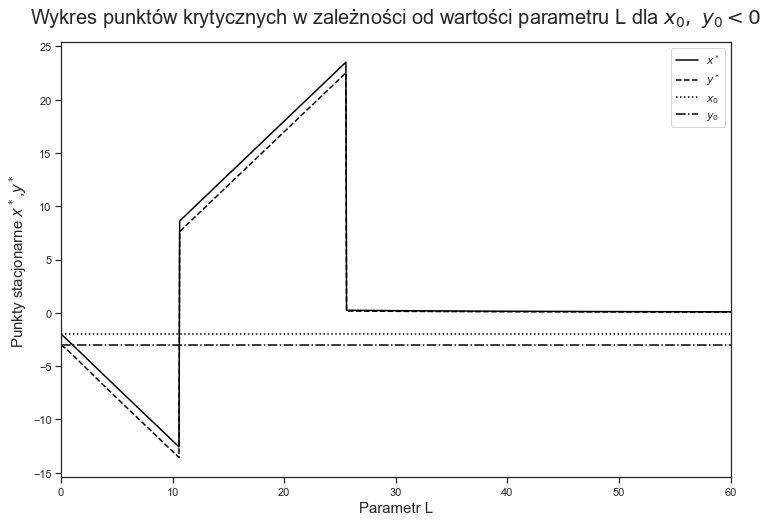

In [23]:
x0 = -2
y0 = -3
L = np.linspace(0, 60, 1000)

y = [critical(i, 1, x0, y0, 0.5, 0.5, x0, y0) for i in L]
df = pd.DataFrame(y, columns = ['x', 'y'])

fig, ax = plt.subplots(1, 1, figsize=(12,8))
plt.hlines(y=x0, xmin=0, xmax=100, linestyle=':', label = "$x_{0}$", color='black')
plt.hlines(y=y0, xmin=0, xmax=100, linestyle='-.', label = "$y_{0}$", color='black')
plt.plot(L, df['x'], color = 'black', linestyle='-', label='$x^*$')
plt.plot(L, df['y'], color = 'black', linestyle='--', label='$y^*$')
plt.xlabel('Parametr L', fontsize = 15)
plt.ylabel('Punkty stacjonarne $x^*$,$y^*$', fontsize = 15)
plt.xlim(0,60)
plt.title('Wykres punktów krytycznych w zależności od wartości parametru L dla $x_0,~y_0<0$', fontsize = '20',
         y=1.03)
plt.legend()
plt.savefig("pkt_krytyczne2.pdf")
plt.show()

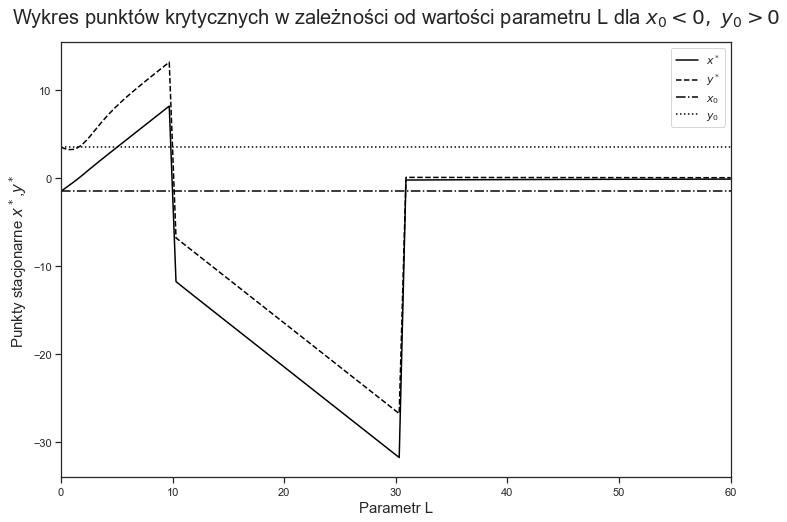

In [24]:
x0 = -1.5
y0 = 3.5
L = np.linspace(0, 60, 100)

y = [critical(i, 1, x0, y0, 0.5, 0.5, x0, y0) for i in L]
df = pd.DataFrame(y, columns = ['x', 'y'])

fig, ax = plt.subplots(1, 1, figsize=(12,8))
plt.hlines(y=x0, xmin=0, xmax=100, linestyles='-.', label = "$x_{0}$", color='black')
plt.hlines(y=y0, xmin=0, xmax=100, linestyles=':', label = "$y_{0}$", color='black')
plt.plot(L, df['x'], color = 'black', linestyle='-', label='$x^*$')
plt.plot(L, df['y'], color = 'black', linestyle='--', label='$y^*$')
plt.xlim(0,60)
plt.xlabel('Parametr L', fontsize = 15)
plt.ylabel('Punkty stacjonarne $x^*$,$y^*$', fontsize = 15)
plt.title('Wykres punktów krytycznych w zależności od wartości parametru L dla $x_0<0,~y_0>0$', fontsize = '20',
         y=1.03)
plt.legend()
plt.savefig('pkt_krytyczne3.pdf')
plt.show()

Problem tkwił w tym, że niewiadomo było jakie dać starting_estimate w obliczeniach numerycznych. Powinien być to punkt możliwie bliski rozwiązaniu, ale my go zupełnie nie znaliśmy. Nie umiałam też wyznaczyć liczby punktów stacjonarnych układu - ona była zmienna w zależności od parametrów. Robiłam wykresy w Mathematice płaszczyzn faozwych i tam widziałam punkty stacjonarne (niekoniecznie wszystkie, bo tylko te na wycinku płaszczyzny, na który patrzyłam). Wtedy, gdy dawałam starting_estimate z wykresu to wyliczało dobrze punkty stacjonarne. Ale określenie stabilności numerycznie tutaj nie ma sensu, bo przy złym starting_estimate mogą wyjść zupełne głupoty.

## Od tej cześći rzeczy nie zostały dodane do pracy

## Druga wersja logistycznej funkcji wpływu

In [105]:
def logistic_new(l1, l2, k, t):
    f = l1 + (l2 - l1)/(1+np.exp(-k*t)) - (l1 + l2)/2
    return f

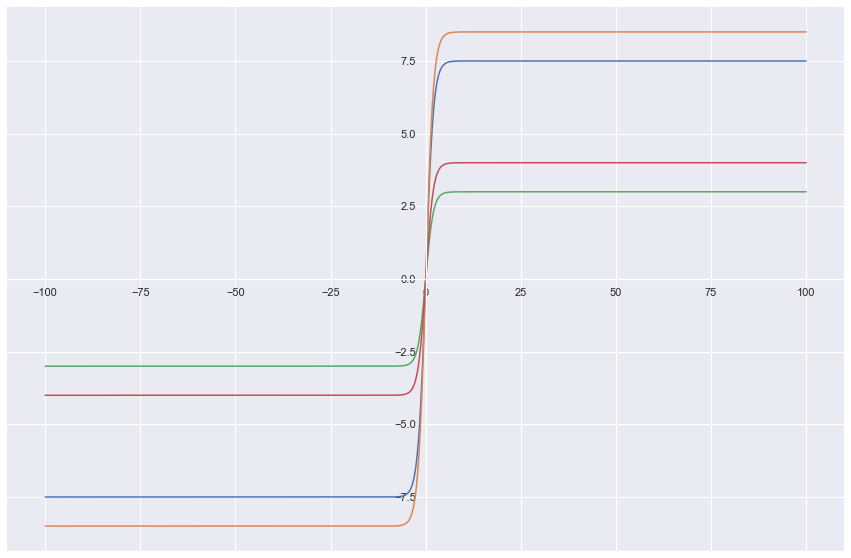

In [107]:
t = np.linspace(-100, 100, 1000)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.plot(t, logistic_new(-10, 5, 1, t))
plt.plot(t, logistic_new(-2, 15, 1, t))
plt.plot(t, logistic_new(-3, 3, 1, t))
plt.plot(t, logistic_new(-7, 1, 1, t))
plt.show()

Dla tej wersji funkcji logistycznej nie możemy porównać wyników z tym co w bazowym modelu, bo nie odniesiemy się do żadnego typu pary.

## Trzecia wersja funkcji logistycznej

In [102]:
def logistic_(l1, l2, k1, k2, x):
    if x>=0:
        f = l1/(1+np.exp(-k1*x)) - l1/2
        return f
    else:
        f = l2/(1+np.exp(-k2*x)) - l2/2
        return f

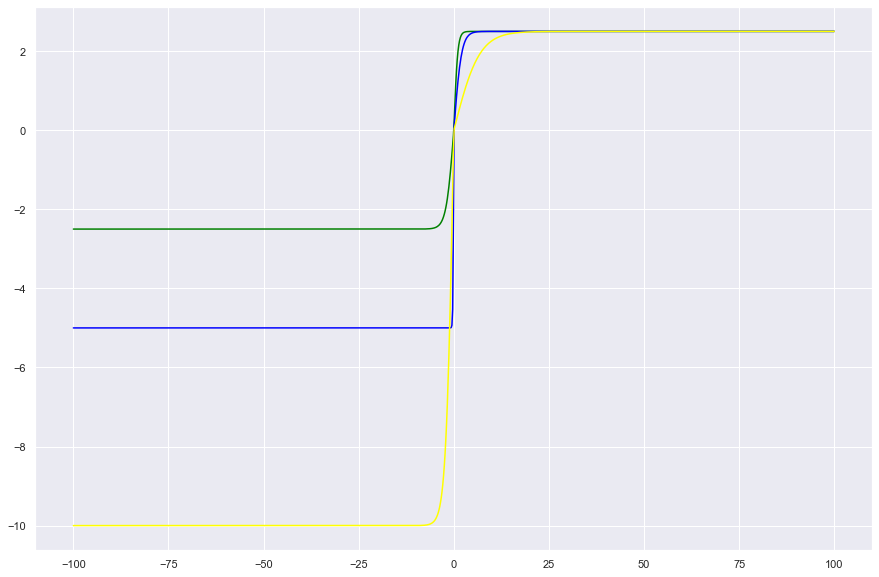

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

plt.plot(t, [logistic_(5, 5, 2, 1, i) for i in t], color = 'green')
plt.plot(t, [logistic_(5, 10, 1, 10, i) for i in t], color = 'blue')
plt.plot(t, [logistic_(5, 20, 0.3, 1, i) for i in t], color = 'yellow')

Przy tego typu funkcji wpływu też nie porównamy z niczym z bazowego modelu, bo mamy nieciągłość w punkcie (0,0).

In [130]:
# czy sprawdzać pkt stacjonarne ze względu na k (jak z L) i liczyć ich stabilność. Czy to ma sens i jest ciekawe?
# Dodać kolejną funkcję do układu równań
# Napisać maila